# Vježba 17.07 Spajanje i popravak tablica o edukacijama

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [7]:
def apply_iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Primjena cappinga
    # Sve vrijednosti manje od donje granice postaju donja granica
    # Sve vrijednosti veće od gornje granice postaju gornja granica
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [8]:
def parse_datum(s):
    for fmt in ('%d.%m.%Y', '%Y-%m-%d', '%m/%d/%Y', '%d-%m-%Y'):
        try:
            return pd.to_datetime(s, format=fmt)
        except:
            continue
    return pd.NaT  # ako nijedan ne uspije

### Učitavnje csv datoteka u pandas dataframove

In [9]:
polaznici=pd.read_csv("./df_polaznici.csv")
tecajevi=pd.read_csv("./df_tecajevi.csv")
upisi=pd.read_csv("./df_upisi.csv")

In [10]:
upisi

,UpisID,PolaznikID,TecajID,Datum_Upisa,Status_Upisa
0,10,1156.0,5095.0,07/20/2023,Aktivan
1,41,1400.0,6202.0,11-10-2023,Završen
2,456,1065.0,5091.0,07/10/2024,Na čekanju
3,404,1314.0,5033.0,2023-11-12,Završen
4,592,1272.0,5090.0,24-02-2022,Aktivan
...,...,...,...,...,...
610,424,1048.0,5047.0,06/13/2024,Aktivan
611,533,1119.0,5012.0,09/25/2022,Aktivan
612,224,1149.0,5044.0,27-10-2023,Aktivan
613,70,1088.0,5084.0,18-05-2024,Aktivan


In [11]:
tecajevi

,TecajID,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD
0,5015,Strojno učenje osnove,Srednji,35.6,88.24
1,5013,Data Storytelling,Srednji,46.0,182.10
2,5082,Strojno učenje osnove,Srednji,26.0,70.64
3,5043,Napredni SQL,srednji,31.8,126.97
4,5064,Strojno učenje osnove,napredni,-10.0,20.00
...,...,...,...,...,...
95,5050,Uvod u Python,srednji,34.9,146.22
96,5021,Cloud Computing,Srednji,42.3,10000.00
97,5086,Data Storytelling,Početni,28.3,180.95
98,5085,Cloud Computing,Početni,NaN,193.78


In [12]:
polaznici

,PolaznikID,Godina_Rodjenja,Regija,Jezik_Platforme
0,1377,1979,Europa,Španjolski
1,1221,1973,Europa,Francuski
2,1100,2002,Europa,Španjolski
3,1218,2000,NaN,Francuski
4,1057,1975,Južna Amerika,Engleski
...,...,...,...,...
405,1044,1952,NaN,Engleski
406,1126,1991,Azija,Engleski
407,1245,2003,Sjeverna Amerika,Engleski
408,1186,1971,Sjeverna Amerika,Španjolski


### Povezivanje df-ova u jedan

In [13]:
polaznici_upisi=pd.merge(polaznici,upisi, on="PolaznikID", how="inner")

In [14]:
polaznici_upisi_tecajevi=pd.merge(polaznici_upisi,tecajevi, on="TecajID", how="inner")

In [15]:
edu=polaznici_upisi_tecajevi.copy()

In [16]:
edu

,PolaznikID,Godina_Rodjenja,Regija,Jezik_Platforme,UpisID,TecajID,Datum_Upisa,Status_Upisa,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD
0,1377,1979,Europa,Španjolski,495,5089.0,12-08-2024,Završen,Cloud Computing,Srednji,19.1,20.00
1,1221,1973,Europa,Francuski,168,5068.0,2022-03-05,Završen,Strojno učenje osnove,Srednji,30.6,81.00
2,1221,1973,Europa,Francuski,449,5083.0,2024-06-16,Aktivan,Cloud Computing,Napredni,22.5,61.05
3,1221,1973,Europa,Francuski,335,5025.0,26-09-2022,Aktivan,Uvod u Python,Početni,NaN,66.03
4,1221,1973,Europa,Francuski,30,5033.0,2023-11-11,Aktivan,Data Storytelling,Početni,30.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
546,1044,1952,NaN,Engleski,58,5094.0,2022-12-25,Odustao,Excel za analizu,Početni,31.8,121.47
547,1126,1991,Azija,Engleski,112,5081.0,04/24/2023,Završen,Vizualizacija podataka,početni,31.5,136.03
548,1186,1971,Sjeverna Amerika,Španjolski,398,5001.0,03/03/2024,Na čekanju,Vizualizacija podataka,Srednji,40.2,185.49
549,1035,1991,Sjeverna Amerika,Engleski,313,5095.0,03/02/2024,Aktivan,Uvod u Python,Početni,42.7,100.04


### Dodavanje novog stupca Starost i brisanje Godina_rodjenja

In [17]:
edu["Starost"]=2025-edu["Godina_Rodjenja"]

In [18]:
edu=edu.drop("Godina_Rodjenja",axis=1)

In [19]:
edu

,PolaznikID,Regija,Jezik_Platforme,UpisID,TecajID,Datum_Upisa,Status_Upisa,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD,Starost
0,1377,Europa,Španjolski,495,5089.0,12-08-2024,Završen,Cloud Computing,Srednji,19.1,20.00,46
1,1221,Europa,Francuski,168,5068.0,2022-03-05,Završen,Strojno učenje osnove,Srednji,30.6,81.00,52
2,1221,Europa,Francuski,449,5083.0,2024-06-16,Aktivan,Cloud Computing,Napredni,22.5,61.05,52
3,1221,Europa,Francuski,335,5025.0,26-09-2022,Aktivan,Uvod u Python,Početni,NaN,66.03,52
4,1221,Europa,Francuski,30,5033.0,2023-11-11,Aktivan,Data Storytelling,Početni,30.6,NaN,52
...,...,...,...,...,...,...,...,...,...,...,...,...
546,1044,NaN,Engleski,58,5094.0,2022-12-25,Odustao,Excel za analizu,Početni,31.8,121.47,73
547,1126,Azija,Engleski,112,5081.0,04/24/2023,Završen,Vizualizacija podataka,početni,31.5,136.03,34
548,1186,Sjeverna Amerika,Španjolski,398,5001.0,03/03/2024,Na čekanju,Vizualizacija podataka,Srednji,40.2,185.49,54
549,1035,Sjeverna Amerika,Engleski,313,5095.0,03/02/2024,Aktivan,Uvod u Python,Početni,42.7,100.04,34


In [20]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PolaznikID       551 non-null    int64  
 1   Regija           522 non-null    object 
 2   Jezik_Platforme  551 non-null    object 
 3   UpisID           551 non-null    int64  
 4   TecajID          551 non-null    float64
 5   Datum_Upisa      548 non-null    object 
 6   Status_Upisa     551 non-null    object 
 7   Naziv_Tecaja     551 non-null    object 
 8   Razina           551 non-null    object 
 9   Trajanje_Sati    491 non-null    float64
 10  Cijena_USD       497 non-null    float64
 11  Starost          551 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 51.8+ KB


### Provjera i brisanje duplikata

In [21]:
edu.duplicated().sum()

np.int64(30)

In [22]:
edu=edu.drop_duplicates()

### Provjera i ispravak tipfelera u stringovima

In [23]:
edu.Regija.value_counts()

Regija
Europa              158
Sjeverna Amerika    118
Azija                83
Afrika               61
Južna Amerika        46
Australija           29
Name: count, dtype: int64

In [24]:
edu["Jezik_Platforme"].value_counts()

Jezik_Platforme
Engleski      272
Španjolski     54
Francuski      52
Njemački       43
Hrvatski       36
engleski       26
španjolski     13
ENG             8
hrvatski        6
francuski       6
ŠPA             3
njemački        1
HRV             1
Name: count, dtype: int64

In [25]:
edu["Jezik_Platforme"]=edu["Jezik_Platforme"].str.title()

/var/folders/n6/jl1ksgl501b4z5wbv6r1g9yc0000gp/T/ipykernel_4145/2432011232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu["Jezik_Platforme"]=edu["Jezik_Platforme"].str.title()


In [26]:
edu["Jezik_Platforme"]=edu["Jezik_Platforme"].replace({"Hrv":"Hrvatski","Špa":"Španjolski","Eng":"Engleski"})

/var/folders/n6/jl1ksgl501b4z5wbv6r1g9yc0000gp/T/ipykernel_4145/734602698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu["Jezik_Platforme"]=edu["Jezik_Platforme"].replace({"Hrv":"Hrvatski","Špa":"Španjolski","Eng":"Engleski"})


In [27]:
edu["Status_Upisa"].value_counts()

Status_Upisa
Aktivan       311
Završen       137
Odustao        48
Na čekanju     25
Name: count, dtype: int64

In [28]:
edu["Naziv_Tecaja"].value_counts()

Naziv_Tecaja
Uvod u Python                 83
Cloud Computing               80
Vizualizacija podataka        74
Strojno učenje osnove         70
Excel za analizu              70
Statistika za Data Science    53
Data Storytelling             50
Napredni SQL                  41
Name: count, dtype: int64

In [29]:
edu["Razina"].value_counts()

Razina
Početni     183
Srednji     176
početni      46
srednji      44
Napredni     30
napredni     14
ADVANCED     13
BEGINNER     10
INTERMED      5
Name: count, dtype: int64

In [30]:
edu["Razina"]=edu["Razina"].str.title()
edu["Razina"]=edu["Razina"].replace({"Beginner":"Početni","Intermed":"Srednji","Advanced":"Napredni"})

/var/folders/n6/jl1ksgl501b4z5wbv6r1g9yc0000gp/T/ipykernel_4145/3081655996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu["Razina"]=edu["Razina"].str.title()
/var/folders/n6/jl1ksgl501b4z5wbv6r1g9yc0000gp/T/ipykernel_4145/3081655996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu["Razina"]=edu["Razina"].replace({"Beginner":"Početni","Intermed":"Srednji","Advanced":"Napredni"})


In [31]:
edu.duplicated().sum()

np.int64(0)

### Provjera i ispravak brojčanih podataka

In [32]:
edu.describe()

,PolaznikID,UpisID,TecajID,Trajanje_Sati,Cijena_USD,Starost
count,521.000000,521.000000,521.000000,466.000000,470.000000,521.000000
mean,1198.416507,302.213052,5051.435701,96.510730,202.978830,47.472169
std,112.670406,172.523306,28.347911,798.927847,926.671631,15.612609
min,1001.000000,1.000000,5001.000000,-10.000000,0.000000,20.000000
25%,1099.000000,153.000000,5028.000000,22.400000,63.930000,35.000000
50%,1198.000000,304.000000,5051.000000,30.100000,108.740000,48.000000
75%,1294.000000,450.000000,5075.000000,37.600000,136.030000,60.000000
max,1400.000000,600.000000,5100.000000,9999.000000,10000.000000,75.000000


### Čišćenje Outliera

<Axes: xlabel='Trajanje_Sati'>

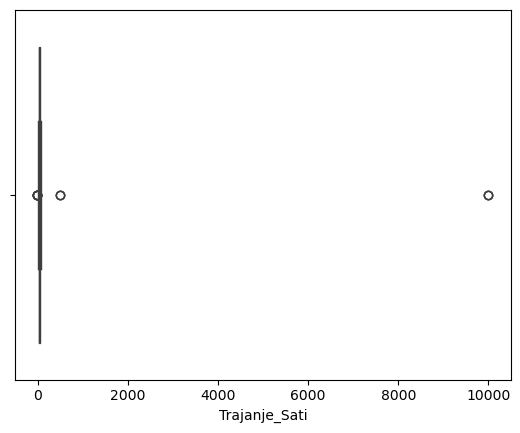

In [33]:
sns.boxplot(data=edu,x="Trajanje_Sati")

In [34]:
edu2=edu.copy()

In [35]:
edu2["Trajanje_Sati"].sort_values(ascending=False)

193    9999.0
284    9999.0
444    9999.0
120     500.0
41      500.0
        ...  
505       NaN
522       NaN
531       NaN
539       NaN
545       NaN
Name: Trajanje_Sati, Length: 521, dtype: float64

In [36]:
edu.loc[edu["Trajanje_Sati"]>499,"Trajanje_Sati"]=np.nan

In [37]:
edu["Trajanje_Sati"]=edu["Trajanje_Sati"].abs()

/var/folders/n6/jl1ksgl501b4z5wbv6r1g9yc0000gp/T/ipykernel_4145/2493030833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu["Trajanje_Sati"]=edu["Trajanje_Sati"].abs()


<Axes: xlabel='Trajanje_Sati'>

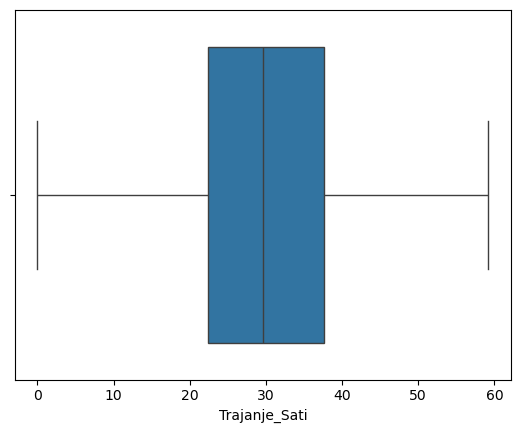

In [38]:
sns.boxplot(data=edu,x="Trajanje_Sati")

<Axes: xlabel='Cijena_USD'>

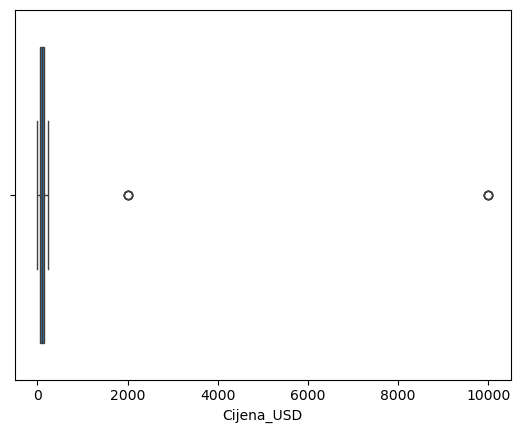

In [39]:
sns.boxplot(data=edu, x="Cijena_USD")

In [40]:
edu3=edu.copy()
edu3["Cijena_USD"].sort_values(ascending=False).head(20)

473    10000.00
369    10000.00
106    10000.00
335    10000.00
354     2000.00
478     2000.00
139     2000.00
234     2000.00
95       224.47
129      224.47
73       224.47
411      224.47
348      224.47
361      196.06
189      196.06
531      193.78
247      193.78
343      193.78
255      193.78
204      193.78
Name: Cijena_USD, dtype: float64

In [41]:
edu.loc[edu["Cijena_USD"]>230,"Cijena_USD"]=pd.NA


<Axes: xlabel='Cijena_USD'>

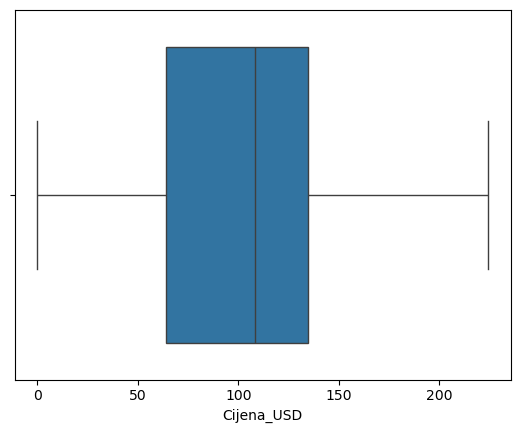

In [42]:
sns.boxplot(data=edu, x="Cijena_USD")

<Axes: xlabel='Starost'>

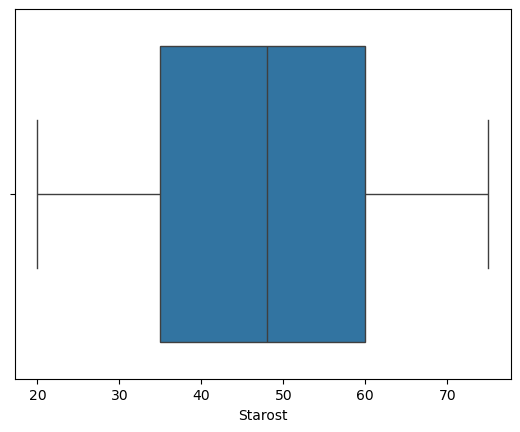

In [43]:
sns.boxplot(data=edu, x="Starost")

### Provjera povezanosti brojčanih podataka

In [44]:
edu.corr(numeric_only=True)

,PolaznikID,UpisID,TecajID,Trajanje_Sati,Cijena_USD,Starost
PolaznikID,1.000000,0.005276,-0.044840,-0.009648,0.022362,-0.086336
UpisID,0.005276,1.000000,-0.094399,-0.004729,0.048438,-0.035244
TecajID,-0.044840,-0.094399,1.000000,0.073449,-0.058907,0.027534
Trajanje_Sati,-0.009648,-0.004729,0.073449,1.000000,0.000215,0.022665
Cijena_USD,0.022362,0.048438,-0.058907,0.000215,1.000000,-0.032474
Starost,-0.086336,-0.035244,0.027534,0.022665,-0.032474,1.000000


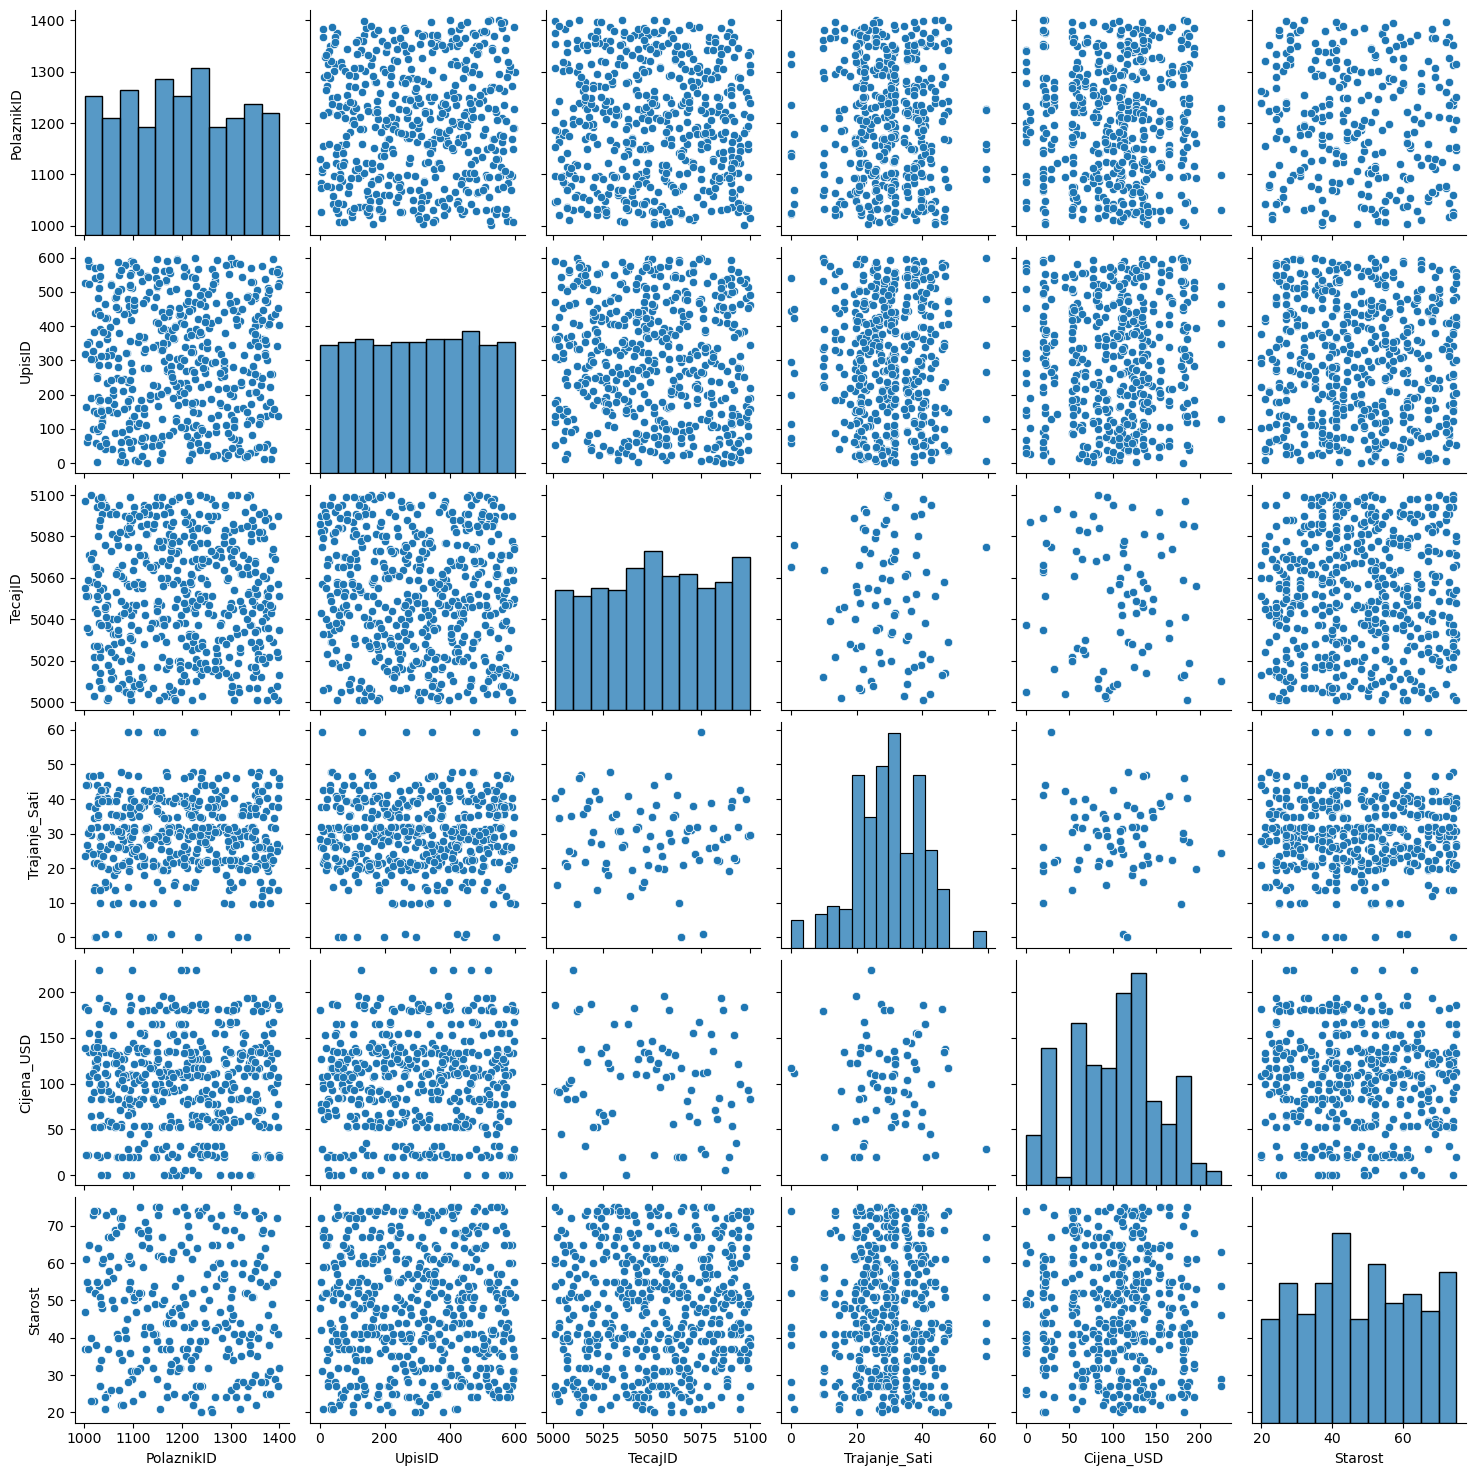

In [45]:
sns.pairplot(edu)

<Axes: xlabel='TecajID', ylabel='Cijena_USD'>

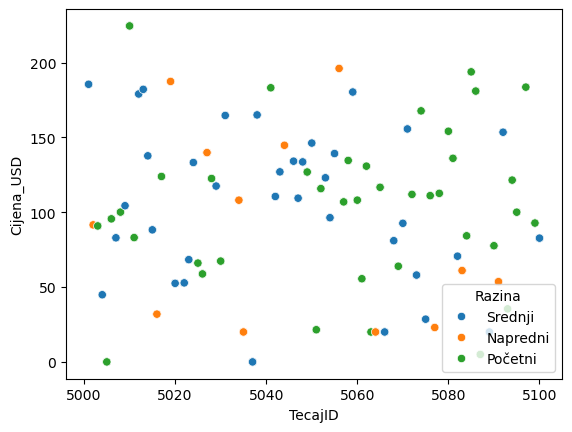

In [46]:
sns.scatterplot(data=edu, x="TecajID", y="Cijena_USD", hue="Razina")

### Primjećene slabe povezanosti što ukazuje na dodatne outlajere unutar podgrupa podataka

Text(0.5, 1.0, 'Trajanje tečaja po razini')

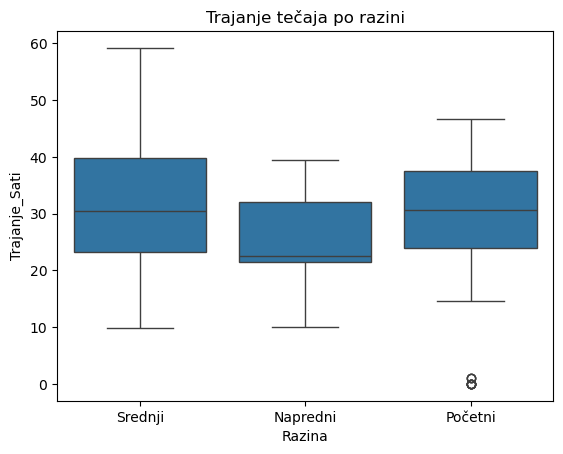

In [47]:
sns.boxplot(data=edu, x="Razina", y="Trajanje_Sati")
plt.title("Trajanje tečaja po razini")

Text(0.5, 1.0, 'Cijena tečaja po razini')

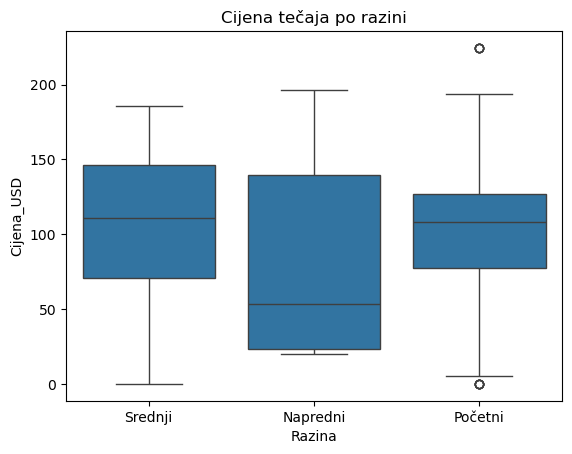

In [48]:
sns.boxplot(data=edu, x="Razina", y="Cijena_USD")
plt.title("Cijena tečaja po razini")

Text(0.5, 1.0, 'Trajanje tečaja po statusu upisa')

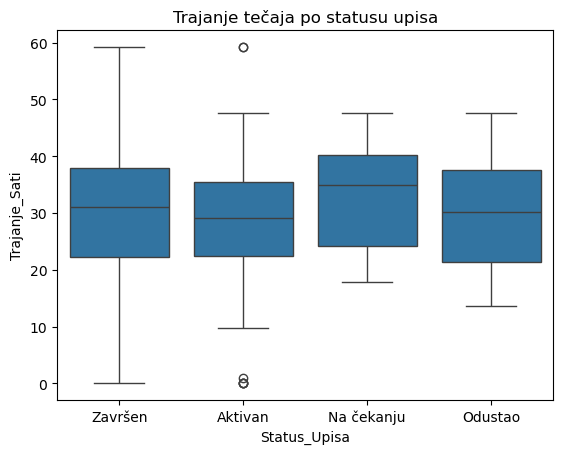

In [49]:
sns.boxplot(data=edu, x="Status_Upisa", y="Trajanje_Sati")
plt.title("Trajanje tečaja po statusu upisa")

Text(0.5, 1.0, 'Cijena tečaja po statusu upisa')

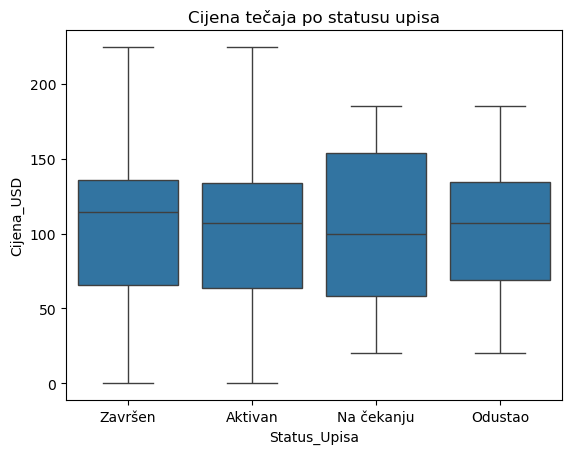

In [50]:
sns.boxplot(data=edu, x="Status_Upisa", y="Cijena_USD")
plt.title("Cijena tečaja po statusu upisa")

Text(0.5, 1.0, 'Trajanje tečaja po regiji')

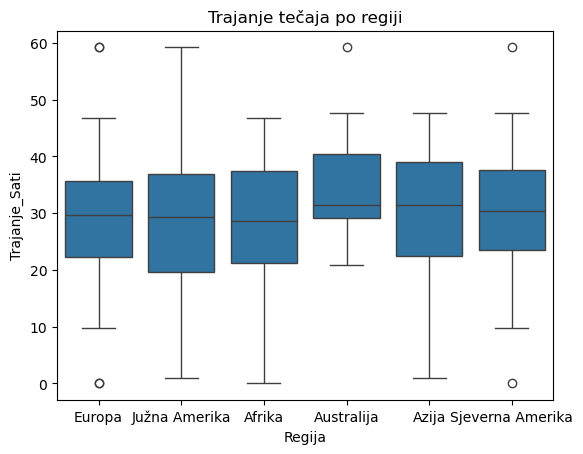

In [51]:
sns.boxplot(data=edu, x="Regija", y="Trajanje_Sati")
plt.title("Trajanje tečaja po regiji")

Text(0.5, 1.0, 'Trajanje tečaja po regiji')

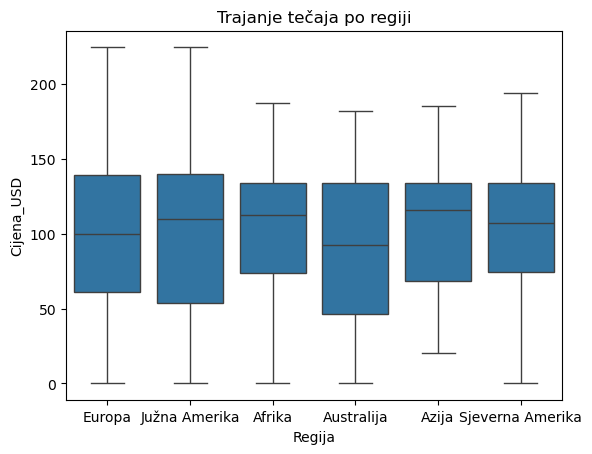

In [52]:
sns.boxplot(data=edu, x="Regija", y="Cijena_USD")
plt.title("Trajanje tečaja po regiji")

### Prema ovim boxplotovima nemože se baš nešto zaključiti osim da postoje outlieri koji su možda i realni s obzirom na staus upisa. Za nekakve ozbiljnije zaključke bi trebalo analizirati samo status upisa završen i u njemu je vidljivo da ima outliere.

In [53]:
edu_zavrseni = edu[edu["Status_Upisa"] == "Završen"]

In [54]:
edu_zavrseni

,PolaznikID,Regija,Jezik_Platforme,UpisID,TecajID,Datum_Upisa,Status_Upisa,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD,Starost
0,1377,Europa,Španjolski,495,5089.0,12-08-2024,Završen,Cloud Computing,Srednji,19.1,20.00,46
1,1221,Europa,Francuski,168,5068.0,2022-03-05,Završen,Strojno učenje osnove,Srednji,30.6,81.00,52
5,1221,Europa,Francuski,27,5087.0,11/08/2022,Završen,Uvod u Python,Početni,NaN,5.00,52
7,1100,Europa,Španjolski,64,5044.0,07-06-2023,Završen,Strojno učenje osnove,Napredni,36.4,144.73,23
9,1057,Južna Amerika,Engleski,42,5081.0,26-09-2024,Završen,Vizualizacija podataka,Početni,31.5,136.03,50
...,...,...,...,...,...,...,...,...,...,...,...,...
522,1180,Južna Amerika,Engleski,388,5077.0,10/22/2022,Završen,Strojno učenje osnove,Napredni,NaN,23.00,47
526,1358,Europa,Francuski,113,5091.0,21-02-2022,Završen,Vizualizacija podataka,Napredni,39.5,53.62,72
527,1358,Europa,Francuski,46,5082.0,07/05/2022,Završen,Strojno učenje osnove,Srednji,26.0,70.64,72
531,1334,Sjeverna Amerika,Engleski,485,5085.0,10-01-2024,Završen,Cloud Computing,Početni,NaN,193.78,24


In [55]:
edu_zavrseni.isna().sum()

PolaznikID          0
Regija              5
Jezik_Platforme     0
UpisID              0
TecajID             0
Datum_Upisa         0
Status_Upisa        0
Naziv_Tecaja        0
Razina              0
Trajanje_Sati      17
Cijena_USD         13
Starost             0
dtype: int64

In [56]:
edu_zavrseni.describe()

,PolaznikID,UpisID,TecajID,Trajanje_Sati,Cijena_USD,Starost
count,137.000000,137.000000,137.000000,120.000000,124.000000,137.000000
mean,1204.591241,298.167883,5055.065693,29.982500,103.418710,47.072993
std,112.203174,184.166987,27.855511,11.939685,52.926748,16.303029
min,1001.000000,4.000000,5001.000000,0.000000,0.000000,20.000000
25%,1115.000000,129.000000,5032.000000,22.325000,65.505000,34.000000
50%,1205.000000,295.000000,5057.000000,31.000000,114.205000,44.000000
75%,1301.000000,462.000000,5079.000000,38.000000,136.030000,60.000000
max,1398.000000,599.000000,5100.000000,59.200000,224.470000,75.000000


### Možemo zaklučiti da su neki tečajevi završeni 0 h što bi značilo da nisu ni pohađali tečaj njih možemo smatrati outlierima. Također cijena 0 bi značilo da nisu plaćali tečaj

In [57]:
edu_zavrseni2=edu_zavrseni.copy()

In [58]:
edu_zavrseni2.sort_values(by='Trajanje_Sati').head(20)

,PolaznikID,Regija,Jezik_Platforme,UpisID,TecajID,Datum_Upisa,Status_Upisa,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD,Starost
384,1141,Europa,Engleski,72,5065.0,2023-09-11,Završen,Excel za analizu,Početni,0.0,116.65,41
178,1234,Afrika,Francuski,295,5065.0,03/26/2022,Završen,Excel za analizu,Početni,0.0,116.65,74
52,1315,Afrika,Engleski,445,5065.0,04/11/2024,Završen,Excel za analizu,Početni,0.0,116.65,28
349,1178,Azija,Engleski,262,5076.0,2024-06-13,Završen,Napredni SQL,Početni,1.0,111.09,61
342,1069,Južna Amerika,Engleski,451,5076.0,29-04-2023,Završen,Napredni SQL,Početni,1.0,111.09,59
359,1362,Europa,Engleski,228,5012.0,06/17/2022,Završen,Vizualizacija podataka,Srednji,9.8,179.00,28
192,1142,Sjeverna Amerika,Engleski,339,5064.0,2024-06-15,Završen,Strojno učenje osnove,Napredni,10.0,20.00,32
45,1190,Europa,Francuski,594,5064.0,12-04-2023,Završen,Strojno učenje osnove,Napredni,10.0,20.00,31
481,1381,Europa,Španjolski,222,5064.0,11/19/2022,Završen,Strojno učenje osnove,Napredni,10.0,20.00,25
317,1101,Azija,Engleski,586,5064.0,30-09-2024,Završen,Strojno učenje osnove,Napredni,10.0,20.00,52


In [59]:
edu_zavrseni2.sort_values(by='Cijena_USD').head(20)

,PolaznikID,Regija,Jezik_Platforme,UpisID,TecajID,Datum_Upisa,Status_Upisa,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD,Starost
179,1046,Europa,Engleski,235,5037.0,08/16/2022,Završen,Excel za analizu,Srednji,NaN,0.00,25
336,1340,NaN,Španjolski,29,5037.0,25-10-2024,Završen,Excel za analizu,Srednji,NaN,0.00,36
293,1163,Sjeverna Amerika,Engleski,562,5037.0,02/03/2023,Završen,Excel za analizu,Srednji,NaN,0.00,50
23,1096,Europa,Engleski,583,5005.0,05-09-2023,Završen,Statistika za Data Science,Početni,NaN,0.01,60
232,1301,Australija,Hrvatski,139,5005.0,2024-07-20,Završen,Statistika za Data Science,Početni,NaN,0.01,26
5,1221,Europa,Francuski,27,5087.0,11/08/2022,Završen,Uvod u Python,Početni,NaN,5.00,52
481,1381,Europa,Španjolski,222,5064.0,11/19/2022,Završen,Strojno učenje osnove,Napredni,10.0,20.00,25
192,1142,Sjeverna Amerika,Engleski,339,5064.0,2024-06-15,Završen,Strojno učenje osnove,Napredni,10.0,20.00,32
132,1354,Azija,Engleski,43,5035.0,15-03-2022,Završen,Napredni SQL,Napredni,26.0,20.00,60
142,1271,Sjeverna Amerika,Španjolski,91,5066.0,18-01-2024,Završen,Data Storytelling,Srednji,20.9,20.00,54


### Nakon sortiranja min vrijednosti sumljive su cijene 23 i niže, a trajanja 10 i niže

In [60]:
edu_zavrseni.loc[edu["Trajanje_Sati"]<=10,"Trajanje_Sati"]=np.nan
edu_zavrseni.loc[edu["Cijena_USD"]<=23,"Cijena_USD"]=np.nan

In [61]:
edu_zavrseni.describe()

,PolaznikID,UpisID,TecajID,Trajanje_Sati,Cijena_USD,Starost
count,137.000000,137.000000,137.000000,110.000000,109.000000,137.000000
mean,1204.591241,298.167883,5055.065693,32.237273,115.898165,47.072993
std,112.203174,184.166987,27.855511,9.589548,43.330442,16.303029
min,1001.000000,4.000000,5001.000000,13.600000,28.560000,20.000000
25%,1115.000000,129.000000,5032.000000,25.775000,82.700000,34.000000
50%,1205.000000,295.000000,5057.000000,31.500000,121.470000,44.000000
75%,1301.000000,462.000000,5079.000000,38.000000,139.850000,60.000000
max,1398.000000,599.000000,5100.000000,59.200000,224.470000,75.000000


Text(0.5, 1.0, 'Trajanje tečaja po razini')

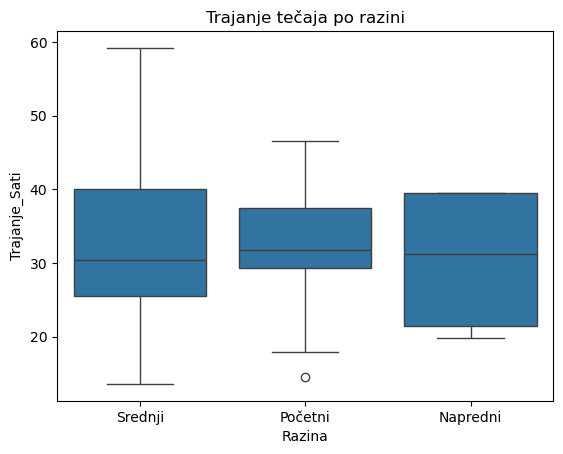

In [62]:
sns.boxplot(data=edu_zavrseni, x="Razina", y="Trajanje_Sati")
plt.title("Trajanje tečaja po razini")

In [63]:
edu_zavrseni = edu_zavrseni.drop(columns=["PolaznikID", "UpisID"])
edu_zavrseni.corr(numeric_only=True)

,TecajID,Trajanje_Sati,Cijena_USD,Starost
TecajID,1.000000,0.170917,-0.080329,0.145258
Trajanje_Sati,0.170917,1.000000,-0.272992,0.041419
Cijena_USD,-0.080329,-0.272992,1.000000,-0.151945
Starost,0.145258,0.041419,-0.151945,1.000000


Text(0.5, 1.0, 'Cijena tečaja po razini')

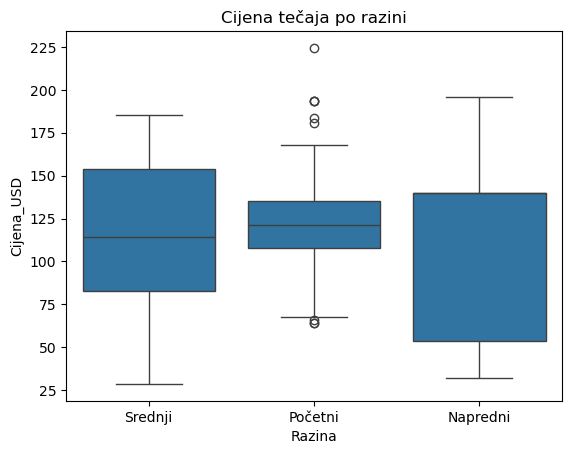

In [64]:
sns.boxplot(data=edu_zavrseni, x="Razina", y="Cijena_USD")
plt.title("Cijena tečaja po razini")

Text(0.5, 1.0, 'Trajanje tečaja po regiji')

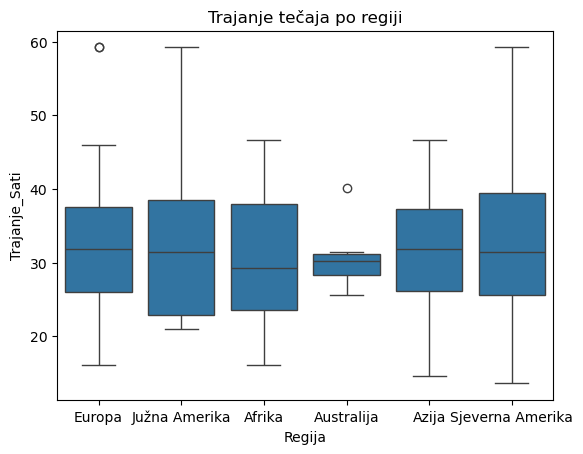

In [65]:
sns.boxplot(data=edu_zavrseni, x="Regija", y="Trajanje_Sati")
plt.title("Trajanje tečaja po regiji")

Text(0.5, 1.0, 'Trajanje tečaja po regiji')

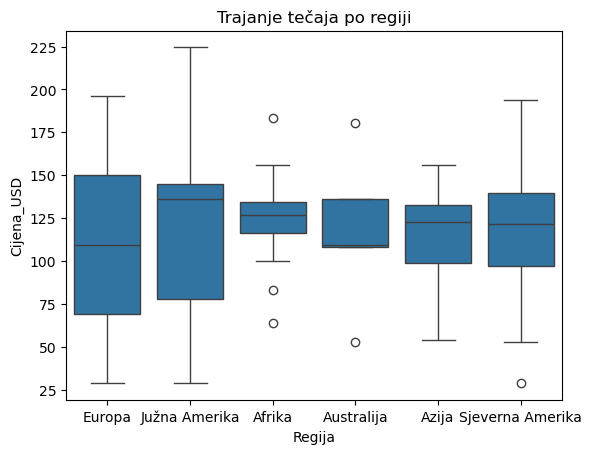

In [66]:
sns.boxplot(data=edu_zavrseni, x="Regija", y="Cijena_USD")
plt.title("Trajanje tečaja po regiji")

Text(0.5, 1.0, 'Trajanje tečaja po jeziku')

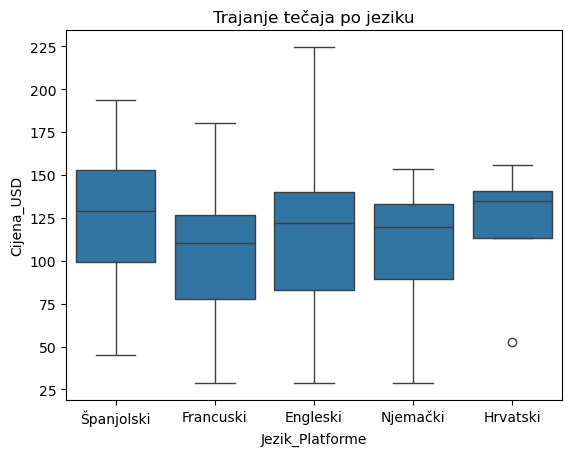

In [67]:
sns.boxplot(data=edu_zavrseni, x="Jezik_Platforme", y="Cijena_USD")
plt.title("Trajanje tečaja po jeziku")

In [68]:
edu_zavrseni3=edu_zavrseni.copy()
label_enc=LabelEncoder()
edu_zavrseni3.Regija=label_enc.fit_transform(edu_zavrseni3.Regija)
edu_zavrseni3["Jezik_Platforme"]=label_enc.fit_transform(edu_zavrseni3["Jezik_Platforme"])
edu_zavrseni3["Razina"]=label_enc.fit_transform(edu_zavrseni3["Razina"])
edu_zavrseni3["Naziv_Tecaja"]=label_enc.fit_transform(edu_zavrseni3["Naziv_Tecaja"])

In [69]:
edu_zavrseni3.corr(numeric_only=True)

,Regija,Jezik_Platforme,TecajID,Naziv_Tecaja,Razina,Trajanje_Sati,Cijena_USD,Starost
Regija,1.000000,-0.004822,-0.024648,-0.082163,-0.025573,0.107698,-0.014556,0.104276
Jezik_Platforme,-0.004822,1.000000,0.074649,0.002244,0.107008,0.004906,-0.009418,-0.056295
TecajID,-0.024648,0.074649,1.000000,0.130429,-0.171064,0.170917,-0.080329,0.145258
Naziv_Tecaja,-0.082163,0.002244,0.130429,1.000000,-0.200509,0.278114,-0.441976,-0.010370
Razina,-0.025573,0.107008,-0.171064,-0.200509,1.000000,0.052429,-0.003827,-0.087548
Trajanje_Sati,0.107698,0.004906,0.170917,0.278114,0.052429,1.000000,-0.272992,0.041419
Cijena_USD,-0.014556,-0.009418,-0.080329,-0.441976,-0.003827,-0.272992,1.000000,-0.151945
Starost,0.104276,-0.056295,0.145258,-0.010370,-0.087548,0.041419,-0.151945,1.000000


<Axes: >

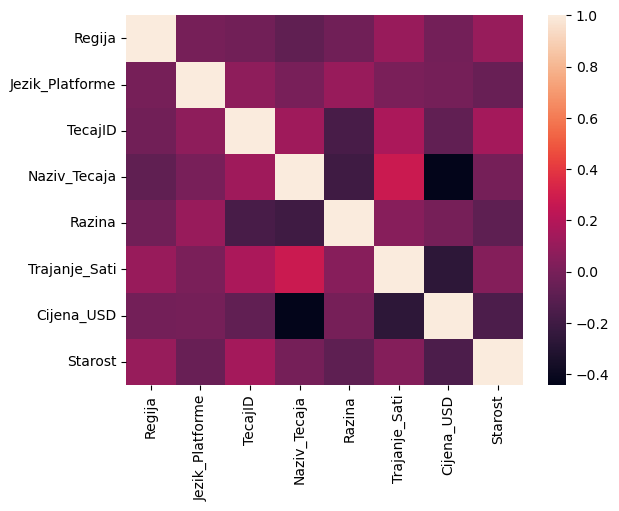

In [70]:
sns.heatmap(edu_zavrseni3.corr(numeric_only=True))

# Zaključak
### Najveću povezanost pokazuju naziv tečaja i trajanje tečaja.
### Za dodatne zaključke potrebno je dodatno istražiti i popraviti subgrupe i nakon toga se mogu na osnovu zaključaka popraviti Nan vrijednosti

Text(0.5, 1.0, 'Trajanje tečaja po nazivu tecaja')

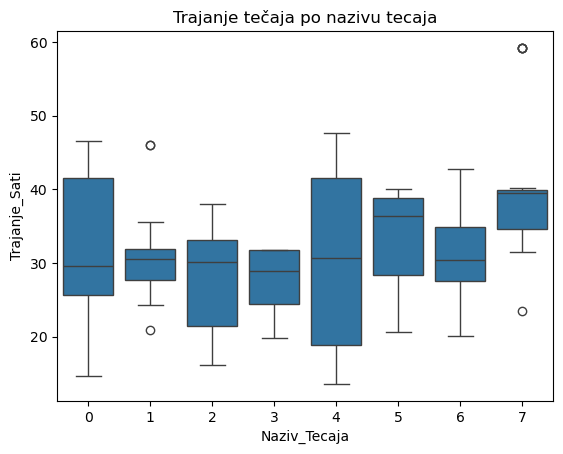

In [71]:
sns.boxplot(data=edu_zavrseni3, x="Naziv_Tecaja", y="Trajanje_Sati")
plt.title("Trajanje tečaja po nazivu tecaja")

Text(0.5, 1.0, 'Prosječno trajanje po nazivu tečaja')

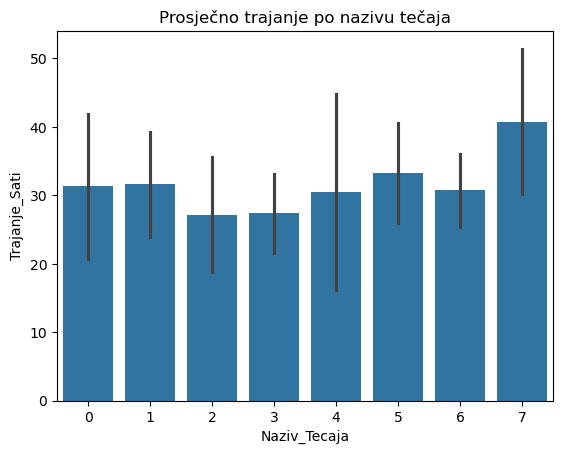

In [72]:
sns.barplot(data=edu_zavrseni3, x="Naziv_Tecaja", y="Trajanje_Sati", estimator="mean", errorbar="sd")
plt.title("Prosječno trajanje po nazivu tečaja")